WEATHER DATA CLASSIFICATION USING SCIKIT-LEARN

Import Libraries: Import necessary libraries for data manipulation, modeling, and evaluation.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = './daily_weather.csv'  #Read the data of the weather from the csv file using read_csv function of pandas dataframe
weather = pd.read_csv(file_path)
print(weather)

      number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
0          0        918.060000     74.822000              271.100000   
1          1        917.347688     71.403843              101.935179   
2          2        923.040000     60.638000               51.000000   
3          3        920.502751     70.138895              198.832133   
4          4        921.160000     44.294000              277.800000   
...      ...               ...           ...                     ...   
1090    1090        918.900000     63.104000              192.900000   
1091    1091        918.710000     49.568000              241.600000   
1092    1092        916.600000     71.096000              189.300000   
1093    1093        912.600000     58.406000              172.700000   
1094    1094        921.530000     77.702000               97.100000   

      avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
0               2.080354              295.400000            2.8

In [3]:
weather.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm', 'Unnamed: 11'],
      dtype='object')

In [4]:
print(weather.head())

   number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
0       0        918.060000     74.822000              271.100000   
1       1        917.347688     71.403843              101.935179   
2       2        923.040000     60.638000               51.000000   
3       3        920.502751     70.138895              198.832133   
4       4        921.160000     44.294000              277.800000   

   avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
0            2.080354              295.400000            2.863283   
1            2.443009              140.471549            3.533324   
2           17.067852               63.700000           22.100967   
3            4.337363              211.203341            5.190045   
4            1.856660              136.500000            2.863283   

   rain_accumulation_9am  rain_duration_9am  relative_humidity_9am  \
0                    0.0                0.0              42.420000   
1                    0.0      

Data Cleaning and Preprocessing: Handle missing values, drop irrelevant columns, and define features and target variables.

In [5]:
# Drop any irrelevant or null columns
weather = weather.drop(columns=['Unnamed: 11'], errors='ignore')

# Handle missing values
weather = weather.dropna()

# Define a high humidity threshold
high_humidity_threshold = 75  

# Create a new column 'high_humidity_label' which is 1 if humidity is above the threshold, else 0
weather['high_humidity_label'] = (weather['relative_humidity_9am'] > high_humidity_threshold).astype(int)

# Define features and target variable
features = ['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am', 
            'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am', 
            'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_3pm']

x = weather[features]
y= weather[['high_humidity_label']].copy()
print(y.head())

   high_humidity_label
0                    0
1                    0
2                    0
3                    0
4                    1


In [6]:
# Check the shapes
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")


x shape: (1064, 9)
y shape: (1064, 1)


Split the Data: Split the dataset into training and testing sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=263)
print(y_test['high_humidity_label'][:10])

801    0
37     0
662    0
696    0
101    0
57     0
84     0
444    0
343    0
614    0
Name: high_humidity_label, dtype: int32


In [8]:
# Check the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (712, 9)
X_test shape: (352, 9)
y_train shape: (712, 1)
y_test shape: (352, 1)


Train the Model: Train a Decision Tree Classifier on the training set. 
Make Predictions: Use the trained model to make predictions on the test set.
Evaluate the Model: Evaluate the model using accuracy score, classification report, and confusion matrix.
Visualize Results: Visualize the confusion matrix to better understand the model's performance.

Accuracy: 92.05%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       302
           1       0.76      0.64      0.70        50

    accuracy                           0.92       352
   macro avg       0.85      0.80      0.82       352
weighted avg       0.92      0.92      0.92       352

Confusion Matrix:
[[292  10]
 [ 18  32]]


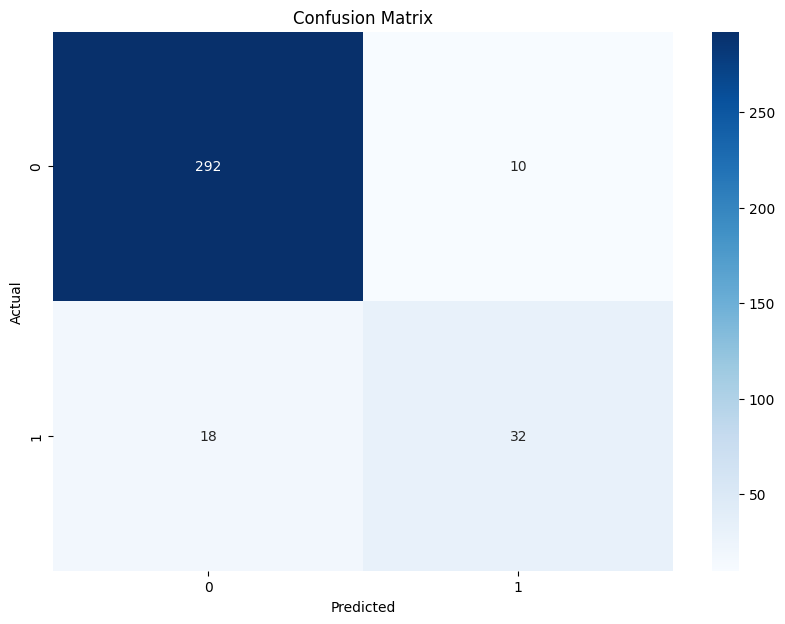

high_humidity_label
0    926
1    138
Name: count, dtype: int64


In [9]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
humidity_classifier.fit(X_train, y_train)
y_predicted = humidity_classifier.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_predicted)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_predicted))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

humidity_counts = weather['high_humidity_label'].value_counts()
print(humidity_counts)
